## Support Vector Machines
The classifiers we have seen so far have used various ways to define a decision boundary. KNN classifiers use a local view given by the neighbors, resulting in a nonlinear, typically fractured decision boundary, Naive Bayes has used elliptic (Gaussian) definitions of the likelihood to delineate between classes, and decision trees use hypercubed to define their decision boundary. Support Vector Machines (SVMs) use a hyperplane to delineate the classes, and the main motivation of the SVM is to ask what the best hyperplane is if the classes is separable. Let's have a look at a simple example with two classes and some options for defining the separating hyperplane.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from JSAnimation import IPython_display
from matplotlib import animation
from IPython.display import HTML
from sklearn import svm
def animateHyperplane(i):
    ax.cla()#clear axes
    ax.axis('equal')
    ax.grid()
    ax.set_ylim(-2.5,12)
    global D,y,slope,intercept
    ax.scatter(D[y == 0][:, 0], D[y == 0][:, 1], color='blue', s=10)
    ax.scatter(D[y == 1][:, 0], D[y == 1][:, 1], color='magenta', s=10)
    # plot hyperplane
    x_vals = np.linspace(D[:, 0].min() - 5, D[:, 0].max() + 5, 100)
    y_vals = slope[i] * x_vals + intercept[i]
    
    ax.plot(x_vals, y_vals,'k-',label=f'Hyperplane {i+1}')
    ax.set_title('What is the best separating hyperplane?')
    ax.legend()
    return

# Generate synthetic 2D data
D, y = make_blobs(n_samples=50, centers=2, cluster_std=1.0, random_state=42)
clf = svm.SVC(kernel='linear')
clf.fit(D, y)
w = clf.coef_[0]
b = clf.intercept_[0]
slope = [1,2,-w[0]/w[1],0.1,8]
intercept=[7,0,-b/w[1],4.5,-6]

fig = plt.figure()
ax = plt.axes()

anim = animation.FuncAnimation(fig, animateHyperplane, frames=5, interval=200, blit=False)

plt.close()
HTML(anim.to_jshtml())

What do you think is the best hyperplane? Think about what happens if we consider test data points of the two blobs. The test data might reach a bit outwards from the training data blobs. Hence, we don't want that the hyperplane is too close to one of the blobs. The best hyperplane is the one that is equidistant to both blobs, Hyperplane 3. Mathematically, this is expressed by the idea to maximize the margin, that is twice the distance to the closest datapoint of the decision boundary. Geometrically, we want to be able to put the widest board between the classes such that all points left and right of the board. The plot below shows the margin boundaries for all hyperplanes.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from JSAnimation import IPython_display
from matplotlib import animation
from IPython.display import HTML
from sklearn import svm
def animateHyperplane(i):
    ax.cla()#clear axes
    ax.axis('equal')
    ax.grid()
    ax.set_ylim(-2.5,12)
    global D,y,slope,intercept
    ax.scatter(D[y == 0][:, 0], D[y == 0][:, 1], color='blue', s=10)
    ax.scatter(D[y == 1][:, 0], D[y == 1][:, 1], color='magenta', s=10)
    # plot hyperplane
    x_vals = np.linspace(D[:, 0].min() - 5, D[:, 0].max() + 5, 100)
    y_vals = slope[i] * x_vals + intercept[i]
    
    # Create margin boundaries
    w = np.array([slope[i],-1])
    b = intercept[i]
    dist = np.abs(D@w+b)/np.linalg.norm(w)
    sv_i = np.argmin(dist)
    margin = np.dot(w,D[sv_i,:])+b
    # Decision boundary function
    def f(x): return -(w[0]*x + b)/w[1]
    lower_margin = f(x_vals) - margin
    upper_margin = f(x_vals) + margin
    # Fill margin area
    ax.fill_between(x_vals, lower_margin, upper_margin, color='c', alpha=0.2)


    
    ax.plot(x_vals, y_vals,'k-',label=f'Hyperplane {i+1}')
    ax.plot(x_vals, upper_margin, 'k--')
    ax.plot(x_vals, lower_margin, 'k--')
    ax.set_title('What is the best separating hyperplane?')
    ax.legend()
    return

# Generate synthetic 2D data
D, y = make_blobs(n_samples=50, centers=2, cluster_std=1.0, random_state=42)
clf = svm.SVC(kernel='linear')
clf.fit(D, y)
w = clf.coef_[0]
b = clf.intercept_[0]
slope = [1,2,-w[0]/w[1],0.1,8]
intercept=[7,0,-b/w[1],4.5,-6]



fig = plt.figure()
ax = plt.axes()

anim = animation.FuncAnimation(fig, animateHyperplane, frames=5, interval=200, blit=False)

plt.close()
HTML(anim.to_jshtml())

### Defining Hyperplanes Mathematically
A hyperplane is a generalization of a line (in 2D) or a plane (in 3D) to any number of dimensions.
In $\mathbb{R}^d$, a hyperplane is a flat, $(d−1)$-dimensional subspace that divides the space into two halves.
```{prf:definition}
Given a vector $\vvec{w}\in\mathbb{R}^d$ and value $b\in\mathbb{R}$, then
a hyperplane is defined as the set of all points satisfying the equation
$$\mathcal{H}_{\vvec{w},b} = \{\vvec{x}\in\mathbb{R}^d\mid\vvec{w}^\top \vvec{x}+b=0\}.$$
The vector $\vvec{w}$ is called the **normal vector** and $b$ is called **bias**.
```
Why are hyperplanes defined like that? We first have a look at a hyperplane with no bias ($b=0$). The plot below shows a hyperplane defined as $\vvec{w}^\top \vvec{x}=0$ and the normal vector $\vvec{w}$. Recall from {ref}`lina_projection` that a vector product with a norm one vector $\tilde{\vvec{w}}=\vvec{w}/\lVert \vvec{w}\rVert$ has a geometric interpretation as the length of the projection of $\vvec{x}$ onto $\tilde{\vvec{w}}$. Hence, all vectors satisfying
$$\vvec{w}^\top\vvec{x}=0\Leftrightarrow \frac{\vvec{w}^\top}{\lVert \vvec{w}\rVert}\vvec{x}=0\Leftrightarrow \tilde{\vvec{w}}^\top\vvec{x}=0$$
land on the origin when being projected onto $\vvec{w}$.
```{tikz}
\begin{tikzpicture}[scale=1.2, thick, >=Stealth]

  % Axes
  \draw[->,thin] (-1, 0) -- (4, 0) node[anchor=west] {$x_1$};
  \draw[->,thin] (0, -2) -- (0, 4) node[anchor=south] {$x_2$};

  % Normal vector w = (2,1)
  \coordinate (origin) at (0,0);
  \coordinate (w) at (2,1);
  \draw[->, ultra thick, magenta] (origin) -- (3,1.5) node[anchor=south east] {$\mathbf{w}$};

  % Hyperplane: 2x + y  = 0 → y = -2x  sqrt(5)
  \draw[black, thick, domain=1:-2] plot (\x, {-2*\x}) node[anchor=north west, right =4pt] {$\tilde{\mathbf{w}}^\top \mathbf{x} = 0$};

\end{tikzpicture}
```

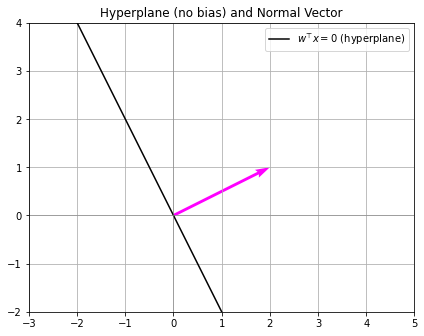

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the normal vector w (e.g., 2D)
w = np.array([2, 1])  # change this to try different orientations

# Generate x values
x_vals = np.linspace(-5, 5, 100)

# Hyperplane: w^T x = 0 → w1*x + w2*y = 0 → y = -w1/w2 * x
slope = -w[0] / w[1]
y_vals = slope * x_vals

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(x_vals, y_vals, 'k-', label=r'$w^\top x = 0$ (hyperplane)')

# Plot the normal vector from origin
ax.quiver(0, 0, w[0], w[1], angles='xy', scale_units='xy', scale=1, color='magenta')

# Format
ax.set_xlim(-3, 5)
ax.set_ylim(-2, 4)
ax.axhline(0, color='gray', linewidth=0.5)
ax.axvline(0, color='gray', linewidth=0.5)
ax.set_aspect('equal')
ax.grid(True)
ax.set_title("Hyperplane (no bias) and Normal Vector")
ax.legend()
plt.tight_layout()
plt.show()


Now, we can define all kinds of lengths that the projection onto $\tilde{\vvec{w}}$ shall have. For example, we can define the hyperplane that's orthogonal to the normal vector $\vvec{w}$ from the plot above, and that has distance two to the origin as the hyperplane 
$$\frac{\vvec{w}^\top}{\lVert\vvec{w}\rVert} \vvec{x}=2\Leftrightarrow \tilde{\vvec{w}}^\top\vvec{x}=2.$$
This hyperplane is plotted below.
```{tikz}
\begin{tikzpicture}[scale=1.2, thick, >=Stealth]
\begin{groupplot}[
    group style={
        group size=2 by 1, % 2 plots in 1 row
        horizontal sep=2cm,
    },
    width=7cm,
    height=7cm,
]
\nextgroupplot[
    xlabel={$x_1$},
    ylabel={$x_2$},
    axis equal,
    xtick=\empty,
    ytick=\empty,
    xmin=-1, xmax=4,
    ymin=-2, ymax=4,
    axis x line=middle,       % x-axis through origin
    axis y line=middle,       % y-axis through origin
    enlargelimits=0.2,        % space around the plot
]
  
  % Normal vector w = (2,1)
  \draw[->, ultra thick, magenta] (axis cs:0,0) -- (axis cs:3,1.5) node[anchor=south east] {$\mathbf{w}$};


  % Hyperplane: 2x + y - 2 sqrt(5) = 0 → y = -2x + 2 sqrt(5)
  \addplot[domain=3.8:-0.2, thick, black] {-2*x + 2*2.24} node[above] at (axis cs:1.5,4) {$\tilde{\mathbf{w}}^\top \mathbf{x} = 2$}; 

  % Projection of origin onto hyperplane
  % Formula: p = b * w / ||w||^2 → with w = (2,1), b = 2
  %\coordinate (proj) at ($(2/2.24*2, 2/2.24*1)$); % = (1.78, 0.89)

  % Brace-like annotation
  \draw [decorate,decoration={brace,mirror,raise=6pt,amplitude=5pt}, blue, ultra thick] (axis cs:0,0) -- (axis cs:1.78,0.89) node[midway, xshift=8pt, yshift=-20pt, blue] {$2$};
%
\nextgroupplot[
    xlabel={$x_1$},
    ylabel={$x_2$},
    axis equal,
    xtick=\empty,
    ytick=\empty,
    xmin=-1, xmax=4,
    ymin=-2, ymax=4,
    axis x line=middle,       % x-axis through origin
    axis y line=middle,       % y-axis through origin
    enlargelimits=0.2,        % space around the plot
]
  
  % Normal vector w = (2,1)
  \draw[->, ultra thick, magenta] (axis cs:0,0) -- (axis cs:3,1.5) node[anchor=south east] {$\mathbf{w}$};


  % Hyperplane: 2x + y - 2 sqrt(5) = 0 → y = -2x + 2 sqrt(5)
  \addplot[domain=3.8:-0.2, thick, black] {-2*x + 2*2.24} node[above] at (axis cs:2,4) {$\mathbf{w}^\top \mathbf{x} +b = 0$}; 

  % Projection of origin onto hyperplane
  % Formula: p = b * w / ||w||^2 → with w = (2,1), b = 2
  %\coordinate (proj) at ($(2/2.24*2, 2/2.24*1)$); % = (1.78, 0.89)

  % Brace-like annotation
  \draw [decorate,decoration={brace,mirror,raise=6pt,amplitude=5pt}, blue, ultra thick] (axis cs:0,0) -- (axis cs:1.78,0.89) node[midway, xshift=8pt, yshift=-30pt, blue] {$\displaystyle \frac{\lvert b\rvert}{\lVert w\rVert}$};

\end{groupplot}
\end{tikzpicture}
```

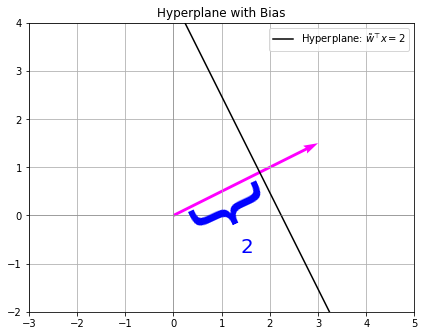

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Normal vector w and bias b
w = np.array([2, 1])*1.5
b = -2*np.linalg.norm(w)  # nonzero bias


# Hyperplane: w^T x + b = 0 → y = -(w1*x + b)/w2
x_vals = np.linspace(-5, 5, 100)
y_vals = -(w[0] * x_vals + b) / w[1]

# Distance from origin to hyperplane
margin = abs(b) / np.linalg.norm(w)
projection = -b * w / np.dot(w, w)  # projection of origin onto hyperplane

# Plot
fig, ax = plt.subplots(figsize=(6, 6))

# Hyperplane
ax.plot(x_vals, y_vals, 'k-', label=r'Hyperplane: $\tilde{w}^\top x  = 2$')

# Normal vector
ax.quiver(0, 0, w[0], w[1], angles='xy', scale_units='xy', scale=1, color='magenta')

# Simulated brace using a rotated "{" character
brace_x, brace_y = projection / 2
ax.text(brace_x, brace_y-0.1, '{', fontsize=80, ha='center', va='center', rotation=115, color='blue')

# Distance label next to the brace
ax.text(brace_x + 0.5, brace_y-1.1, f"{margin:.0f}", fontsize=20, color='blue', va='center')

# Plot settings
ax.set_xlim(-3, 5)
ax.set_ylim(-2, 4)
ax.axhline(0, color='gray', linewidth=0.5)
ax.axvline(0, color='gray', linewidth=0.5)
ax.set_aspect('equal')
ax.grid(True)
ax.set_title("Hyperplane with Bias")
ax.legend()
plt.tight_layout()
plt.show()


The hyperplane from the plot above is likewise defined as the points $\vvec{x}$ satisfying
$$\vvec{w}^\top \vvec{x} - 2\lVert\vvec{w}\rVert=0,$$
which adheres to the general definition of a hyperplane with $b=-2\lVert\vvec{w}\rVert$. Keep in mind, that we can interpret this hyperplane equation when dividing by the norm of the vector $\vvec{w}$.
As a result, geometrically we can say that $\vvec{w}$ controls the orientation of the hyperplane, and $b$ controls the offset from the origin.

### Inference of a Linear SVM for Binary Classification
A hyperplane divides a space into two halves. Assuming now that we have only two classes (a binary classification problem). The hyperplane should be positioned such that one class is on one side and the other class is on the other. We can call the sides *positive* and *negative*, the positive side is the one the normal vector points to and the negative is the other side. 

\begin{eqnarray}
{\bf w}^{T} {\bf x} + b &<& 0\,\, \mbox{(negative side)} \nonumber \\
{\bf w}^{T} {\bf x} + b &\geq& 0\,\, \mbox{(positive side)}. \nonumber
\end{eqnarray}

```{tikz}
\begin{tikzpicture}[scale=1.2, thick, every node/.style={font=\large}]
  % Limit the drawing area
  \clip (-5, -4) rectangle (4.5, 3.5);
  % Define the hyperplane: (2x + y)/sqrt(5) = 2 → y = -2x +2/sqrt(5)
  \def\slope{-2}
  \def\intercept{2/2.23}

  % Draw two colored regions
  \fill[blue!10] (-3,{\slope*(-2) + \intercept}) -- (4,{\slope*(-3) + \intercept})-- (4,{\slope*4 + \intercept}) -- cycle;
  \fill[red!10] (-3,{\slope*3 + \intercept}) -- (3,{\slope*3 + \intercept}) -- (-3,{\slope*(-3) + \intercept}) -- cycle;

  % Draw the hyperplane
  \draw[black, thick] (-2, {\slope*(-2) + \intercept}) -- (2, {\slope*2 + \intercept}) node[anchor=north west,below=2pt] {$\mathbf{w}^\top \mathbf{x} + b = 0$};

  % Axes
  \draw[->,thin] (-3, 0) -- (3, 0) node[anchor=west] {$x_1$};
  \draw[->,thin] (0, -3.5) -- (0, 3) node[anchor=south] {$x_2$};

  % Normal vector w = (2,1)
  \draw[->, ultra thick, magenta] (0, 0) -- (1, 0.5) node[anchor=south west] {$\mathbf{w}$};
  \node at (2, 2) {$\mathbf{w}^\top \mathbf{x} + b > 0$};
  \node at (-1.5, -1.5) {$\mathbf{w}^\top \mathbf{x} + b < 0$};
\end{tikzpicture}
```
This way, we can define the inference of the SVM for the binary classification problem
```{prf:definition} SVM for binary Classification
An SVM classifier for a binary classification problem ($y\in\{-1,1\}$) reflects the distance to the decision boundary $\vvec{w}^\top \vvec{x}+b=0$
$$f_{svm}(\vvec{x}) = \vvec{w}^\top \vvec{x}+b.$$
If $f_{svm}(\vvec{x})$ is positive, then we predict class 1, and otherwise class -1. Using the sign function
$$ \sign(a) = \begin{cases} +1 & \text{ if } a \geq 0 \\ -1 & \text{ otherwise}  \end{cases}, $$ 
we define the class prediction as
$$\hat{y} = \sign(\vvec{w}^\top \vvec{x}+b).$$
```
### Training of an SVM when Classes are Separable
We assume for now that the classes are linearly separable, as in our initial example with the two blobs. That means that we can find a hyperplane (defined now as a set)
$\mathcal{H}_{\vvec{w},b}$
such that all training data points of the positive class are on the positive side, and the training data points of the negative class are on the negative side. That is, we can find $\vvec{w}$ and $b$ such that
\begin{align*}
\vvec{w}^\top \vvec{x}_i+b <0 & \text{ for all } i \text{ with }y_i=-1\\
\vvec{w}^\top \vvec{x}_i+b >0 & \text{ for all } i \text{ with }y_i=1.
\end{align*}
The equations above are satisfied if we have for all training data points
$$
(\vvec{w}^\top \vvec{x}_i+b)y_i >0.
$$
The goal of the SVM is to find the hyperplane with maximum margin among all the separable hyperplanes. Hence, the SVM hyperplane maximizes the distance to the closest training data point. This way, we can define our SVM task.
`````{admonition} Task (hard-margin SVM)
:class: tip
:name: hard_margin_svm_task
**Given** a binary classification training data set $\mathcal{D}=\{(\vvec{x}_i,y_i)\mid 1\leq i\leq n, y_i\in\{-1,1\}\}$.       

**Find** the hyperplane defined as all points in the set $\mathcal{H}_{\vvec{w},b}\{\vvec{x}\mid\vvec{w}^\top\vvec{x}+b=0\}$ separating the classes and having maximum margin (maximizing the distance of the hyperplane to its closest training data point indicated by $dist$).
$$\max_{\vvec{w},b}\min_{1\leq i\leq n}dist(\mathcal{H}_{\vvec{w},b},\vvec{x}_i)\text{ s.t. } y_i(\vvec{w}^\top\vvec{x}_i+b)\geq 0$$
**Return** the hyperplane defining parameters $\vvec{w},b$ 
`````
To formalize the SVM task, we need to know how we compute the distance of a point to a hyperplane. Geometrically, this works by projecting the point on the normal vector $\vvec{w}$, giving the distance from the origin to the projection onto $\vvec{w}$. The projection is computed by the vector product of $\vvec{w}$ with the normed vector $\tilde{\vvec{w}}$. From this distance, we subtract the offset from the origin $\frac{b}{\lVert \vvec{w}\rVert}$ and we have the distance to the hyperplane. This is ilustrated in the plot below. The plot on the left shows an example where the offset to the origin is equal to two. The plot on the right annotates the distances for the more general case, where a hyperplane is defined over the formula $\vvec{w}^\top \vvec{x}+b=0$. 
```{tikz}
\begin{tikzpicture}[scale=1.2, thick, >=Stealth]
\begin{groupplot}[
    group style={
        group size=2 by 1, % 2 plots in 1 row
        horizontal sep=2cm,
    },
    width=7cm,
    height=7cm,
]
\nextgroupplot[
    xlabel={$x_1$},
    ylabel={$x_2$},
    axis equal,
    xtick=\empty,
    ytick=\empty,
    xmin=-0.5, xmax=5,
    ymin=-2, ymax=4,
    axis x line=middle,       % x-axis through origin
    axis y line=middle,       % y-axis through origin
    enlargelimits=0.2,        % space around the plot
]
  
  % Normal vector w = (2,1)
  \draw[->, ultra thick, magenta] (axis cs:0,0) -- (axis cs:6,3) node[anchor=south east] {$\mathbf{w}$};


  % Hyperplane: 2x + y - 2 sqrt(5) = 0 → y = -2x + 2 sqrt(5)
  \addplot[domain=3.8:-0.2, thick, black] {-2*x + 2*2.24} node[above] at (axis cs:1.5,4) {$\tilde{\mathbf{w}}^\top \mathbf{x} = 2$}; 

  % Projection of origin onto hyperplane
  % Formula: p = b * w / ||w||^2 → with w = (2,1), b = 2
  %\coordinate (proj) at ($(2/2.24*2, 2/2.24*1)$); % = (1.78, 0.89)

  % Brace-like annotation
  \draw [decorate,decoration={brace,mirror,raise=5pt,amplitude=5pt}, blue, ultra thick] (axis cs:0,0) -- (axis cs:1.78,0.89) node[midway, xshift=8pt, yshift=-15pt, blue] {$2$};
  
  % Plot point
  \draw (axis cs:3,3) circle[radius=2pt] node[right=3pt]{$\mathbf{x}$}; 
  \fill (axis cs:3,3) circle[radius=2pt];
  %(w.Tx/||w||)w/||w|| = w.Txw/||w|^2
  % w.Tx = 3*2 +3*1 = 9
  % projection: (9/5*2,9/5*1) = 3.6,1.8
  \draw[dashed, thick] (axis cs:3,3) -- (axis cs:3.6,1.8);
  \draw [decorate,decoration={brace,mirror,raise=23pt,amplitude=5pt}, orange, ultra thick] (axis cs:0,0) -- (axis cs:3.6,1.8) node[midway, xshift=35pt, yshift=-28pt, orange] {$ \tilde{\mathbf{w}}^\top\mathbf{x}$};
  \draw [decorate,decoration={brace,mirror,raise=55pt,amplitude=5pt}, cyan, ultra thick] (axis cs:1.78,0.89) -- (axis cs:3.6,1.8) node[midway, xshift=42pt, yshift=-65pt, cyan] {$ \tilde{\mathbf{w}}^\top\mathbf{x} - 2$};
%
\nextgroupplot[
    xlabel={$x_1$},
    ylabel={$x_2$},
    axis equal,
    xtick=\empty,
    ytick=\empty,
    xmin=-0.5, xmax=5,
    ymin=-2, ymax=4,
    axis x line=middle,       % x-axis through origin
    axis y line=middle,       % y-axis through origin
    enlargelimits=0.2,        % space around the plot
]
  
  % Normal vector w = (2,1)
  \draw[->, ultra thick, magenta] (axis cs:0,0) -- (axis cs:6,3) node[anchor=south east] {$\mathbf{w}$};


  % Hyperplane: 2x + y - 2 sqrt(5) = 0 → y = -2x + 2 sqrt(5)
  \addplot[domain=3.8:-0.2, thick, black] {-2*x + 2*2.24} node[above] at (axis cs:1.7,4) {$\mathbf{w}^\top \mathbf{x} +b = 0$}; 

  % Projection of origin onto hyperplane
  % Formula: p = b * w / ||w||^2 → with w = (2,1), b = 2
  %\coordinate (proj) at ($(2/2.24*2, 2/2.24*1)$); % = (1.78, 0.89)

  % Brace-like annotation
  \draw [decorate,decoration={brace,mirror,raise=5pt,amplitude=5pt}, blue, ultra thick] (axis cs:0,0) -- (axis cs:1.78,0.89) node[midway, xshift=8pt, yshift=-25pt, blue] {$\displaystyle \frac{\lvert b\rvert}{\lVert w\rVert}$};
  
  % Plot point
  \draw (axis cs:3,3) circle[radius=2pt] node[right=3pt]{$\mathbf{x}$}; 
  \fill (axis cs:3,3) circle[radius=2pt];
  %(w.Tx/||w||)w/||w|| = w.Txw/||w|^2
  % w.Tx = 3*2 +3*1 = 9
  % projection: (9/5*2,9/5*1) = 3.6,1.8
  \draw[dashed, thick] (axis cs:3,3) -- (axis cs:3.6,1.8);
  \draw [decorate,decoration={brace,mirror,raise=5pt,amplitude=5pt}, cyan, ultra thick] (axis cs:1.78,0.89) -- (axis cs:3.6,1.8) node[midway, xshift=25pt, yshift=-28pt, cyan] {$\displaystyle\frac{\lvert \mathbf{w}^\top\mathbf{x} + b\rvert}{\lVert\mathbf{w}\rVert}$};
\end{groupplot}
\end{tikzpicture}
```
As a result, we can write the distance function as
$$dist(\mathcal{H}_{\vvec{w},b},\vvec{x}_i)=\frac{\lvert\vvec{w}^\top\vvec{x}_i+b\rvert}{\lVert \vvec{w}\rVert}.$$
Inserting this formula in the hard-margin SVM task does however not give a nice objective. The inner minimization of the distance over all data points is a combinatorial optimization that is generally very hard to solve and we can't even apply our numerical approaches. So, we try to transform this objective into a nicer form. We observe that the constraints are related to the distance of training data points to the hyperplane. If $y_i(\vvec{w}^\top\vvec{x}+b)\geq 0$, then we have $y_i(\vvec{w}^\top\vvec{x}+b)=\lvert \vvec{w}^\top\vvec{x}+b\rvert$, and hence we can write 
$$dist(\mathcal{H}_{\vvec{w},b},\vvec{x}_i)=\frac{y_i(\vvec{w}^\top\vvec{x}_i+b)}{\lVert \vvec{w}\rVert}.$$
This allows us to simplify the {ref}`Hard Margin SVM<hard_margin_svm_task>` task, by defining the minimum distance of a point to the hyperplane as $\delta$, such that we have to maximize $\delta$ under the constraint that all points have at least distance $\delta$ to the hyperplane and lie on the correct side: 
\begin{align*}
\max_{\vvec{w},b,\delta}\delta \text{ s.t. } \frac{y_i(\vvec{w}^\top\vvec{x}_i+b)}{\lVert \vvec{w}\rVert}\geq \delta.
\end{align*}
This objective looks already much better, since we got rid of the combinatorial optimization part. But we can simplify this objective even more, because we don't need the parameter $\delta$. To see that, we rewrite the constraints as
$$
y_i(\vvec{w}^\top\vvec{x}_i+b)\geq \delta \lVert \vvec{w}\rVert
$$
For any given $\delta$ we can scale $\vvec{w}$ such that $\delta \lVert \vvec{w}\rVert=1$. In this case, the minimum distance of a data point to the hyperplane is $\delta = \frac{1}{\lVert\vvec{w}\rVert}$. We substitute this into our objective and get
\begin{align*}
\max_{\vvec{w},b}\frac{1}{\lVert\vvec{w}\rVert} \quad\text{ s.t. } \frac{y_i(\vvec{w}^\top\vvec{x}_i+b)}{\lVert \vvec{w}\rVert}\geq 1.
\end{align*}
This objective is already pretty good but the maximum of $\frac{1}{\lVert\vvec{w}\rVert}$ is reached when $\lVert\vvec{w}\rVert\rightarrow 0$. This can result in numerical instabilities, since we don't want to divide by zero. This issue is easily solved by minimizing $\lVert\vvec{w}\rVert^2$ instead. We use the squared norm because this is easier to optimize than applying the square root from the Euclidean norm. As a result, we can conclude the following theorem, specifying the hard margin SVM objective.
```{prf:theorem} Hard Margin SVM objective
The following objective solves the {ref}`Hard Margin SVM<hard_margin_svm_task>` task
$$\min_{\vvec{w},b}\lVert \vvec{w}\rVert^2\text{ s.t. } y_i(\vvec{w}^\top\vvec{x}_i+b)\geq 1 \text{ for all }1\leq i\leq n.$$ 
```

In [24]:
w1,w2,b = np.linalg.solve(np.array([[1,2,1],[3,4,1],[5,3,1]]),np.array([-1,1,1]))
print(np.linalg.solve(np.array([[1,2,1],[3,4,1],[5,3,1]]),np.array([-1,1,1])))
print(np.array([5,0])+np.array([3,6])/5)
print(np.array([5,0])+2*np.array([3,6])/5)
print(np.array([4,3])+np.array([3,6])/5)
print(np.array([1,4])+np.abs(w1*1+w2*4-np.abs(b-1))/(w1**2+w2**2)*np.array([w1,w2]))
print(np.array([4,3])-np.abs(w1*4+w2*3-np.abs(b+1))/(w1**2+w2**2)*np.array([w1,w2]))

[ 0.33333333  0.66666667 -2.66666667]
[5.6 1.2]
[6.2 2.4]
[4.6 4.2]
[1.4 4.8]
[3. 1.]


The plot below provides a geometric interpretation of the hard margin SVM objective:
* The minimum distance of a training data point to the hyperplane is given as $\frac{1}{\lVert\vvec{w}\rVert}$.
* The training data points that are at minimum distance to the hyperplane are called **support vectors**.
* The SVM decision boundary defined over the equation $\mathbf{w}^\top \mathbf{x} +b = 0$.
* The hyperplanes that go through the support vectors are defined over the equation $\mathbf{w}^\top \mathbf{x} +b = \pm 1$.
* The **margin** is defined as $\frac{2}{\lVert\vvec{w}\rVert}$, can be interpreted as the width of the thickest board that can be put inbetween the classes.
```{tikz}
\begin{tikzpicture}[font=\large, thick, >=Stealth]
\begin{axis}[
    width=\textwidth,   % scale plot width
    axis lines=middle,
    xmin=-2, xmax=5,
    ymin=-2, ymax=7,
    xtick=\empty,
    ytick=\empty,
    label style={font=\large},
    axis equal,
    xlabel={$x_1$},
    ylabel={$x_2$},
    %title={SVM with Margin and Support Vectors},
]

% Positive class (blue)
\addplot[only marks, mark=*, blue, mark options={scale=1.5}] coordinates {
    (3.0,4.0) (5,3) (4,4.5) (2,5.4) 
};
% Negative class (red)
\addplot[only marks, mark=*, red, mark options={scale=1.5}] coordinates {
    (1.0,2) (1,1)  (0.5,1.5) (2,0.5) (-2,1)
};

% Support vectors (circled)
\addplot[only marks, mark=o, mark options={scale=1.7, draw=black, thick}, blue] coordinates {(1.0,2.0)};
\addplot[only marks, mark=o, mark options={scale=1.7, draw=black, thick}, red] coordinates {(3.0,4.0) (5.0,3.0)};

% Decision boundary (hyperplane)
\addplot[domain=-1:5.6, thick, black] {(-0.5)*x + 4} node[above] at (axis cs:-2.5,4.5) {$\mathbf{w}^\top \mathbf{x} +b = 0$};  % y = -x/2 + 4

% Margins (dashed)
\addplot[domain=-1:6.2, gray] {(-0.5)*x + 4 + 1.5} node[above] at (axis cs:-2.5,6) {$\mathbf{w}^\top \mathbf{x} +b = 1$};  % upper margin
\addplot[domain=-1:5,  gray] {(-0.5)*x + 4 - 1.5} node[above] at (axis cs:-2.5,3) {$\mathbf{w}^\top \mathbf{x} +b = -1$};  % lower margin

% Brace for margin
\draw [decorate,decoration={brace,mirror,raise=5pt,amplitude=5pt}, cyan, ultra thick]
  (axis cs:5,0) -- (axis cs:5.6,1.2)
  node[midway, xshift=18pt, yshift=-15pt, cyan] {$\displaystyle\frac{1}{\lVert\mathbf{w}\rVert}$};
\draw [decorate,decoration={brace,mirror,raise=5pt,amplitude=5pt}, cyan, ultra thick]
  (axis cs:5.6,1.2) -- (axis cs:6.2,2.4)
  node[midway, xshift=18pt, yshift=-15pt, cyan] {$\displaystyle\frac{1}{\lVert\mathbf{w}\rVert}$};

\end{axis}
\end{tikzpicture}

```


#### Optimization
The SVM objective is constrained. Hence, a natural choice to solve the objective is to formulate the dual. We formulate our **primal objective** such that the constraints are of the form $g_i(\vvec{x})\geq 0$:
$$\min_{\vvec{w},b}\ \lVert \vvec{w}\rVert^2\quad\text{ s.t. } y_i(\vvec{w}^\top\vvec{x}_i+b)-1\geq 0 \text{ for all }1\leq i\leq n.$$ 
We can now specify the Lagrangian:
```{math}
:label: svm_lagrangian
\begin{align*}
\mathcal{L}((\vvec{w},b),\bm\lambda) = \lVert \vvec{w}\rVert^2 - \sum_{i=1}^n \lambda_i(y_i(\vvec{w}^\top\vvec{x}_i+b)-1)
\end{align*}
```
The Lagrangian is convex with respect to $\vvec{w}$ and $b$, it is the sum of the convex squared L2 norm and affine functions. Hence, the stationary points subject to $\vvec{w}$ and $b$ are the minimizers of the Lagrangian. 
Hence, we write
```{math}
:label: svm_grad_zero
\begin{align*}
\nabla_{\bf w} {\cal L}((\vvec{w},b), \bm\lambda) &= 0 \Leftrightarrow {\bf w} = \frac12\sum_{i=1}^{n} \lambda_{i} y_i {\bf x}_i\\
\frac{\partial {\cal L}((\vvec{w},b), \bm\lambda)}{\partial b} &= 0 \Leftrightarrow \sum_{i=1}^{n} \lambda_i y_i = 0.
\end{align*}
```
Now, we plug in the results from above to obtain the dual objective function:
\begin{align*}
{\cal L}_{dual}(\bm\lambda) &=\left\lVert \frac12\sum_{i=1}^{n} \lambda_{i} y_{i} {\bf x}_{i}\right\rVert^2 - \sum_{i=1}^n \lambda_i\left(y_i\left(\frac12\sum_{j=1}^{n} \lambda_{j} y_{j}\vvec{x}_j^\top\vvec{x}_i+b\right)-1\right)\\
&=\frac{1}{4} \sum_{i=1}^{n} \sum_{j=1}^{n} \lambda_{i} \lambda_{j} y_{i} y_{j} {\bf x}_{i}^\top {\bf x}_{j}  - \frac12\sum_{i=1}^{n} \lambda_{i}y_{i} \sum_{j=1}^{n} \lambda_{j} y_{j} {\bf x}_{j}^\top {\bf x}_{i} - \underbrace{\sum_{i=1}^{n} \lambda_{i} y_{i}}_{= 0} b + \sum_{i=1}^{n} \lambda_{i} \\
&= - \frac{1}{4} \sum_{i=1}^{n} \sum_{j=1}^{n} \lambda_{i} \lambda_{j} y_{i} y_{j} {\bf x}_{i}^\top {\bf x}_{j} + \sum_{i=1}^{n} \lambda_{i}.
\end{align*}

As a result, our dual objective looks now as follows:
````{prf:theorem} Hard Margin Dual
The dual optimization objective to the {ref}`Hard Margin SVM<hard_margin_svm_task>` task is given as
```{math}
:label: svm_dual_hardmarg
\begin{align*}
\min_{\boldsymbol{\lambda}} &  \frac{1}{4} \sum_{i=1}^{n} \sum_{j=1}^{n} \lambda_{i} \lambda_{j} y_{i} y_{j} {\bf x}_{i}^\top {\bf x}_{j} - \sum_{i=1}^{n} \lambda_{i} \\
\text{s.t. } &  \sum_{i=1}^{n} \lambda_{i} y_{i} = 0,\ 
\lambda_{i}\geq 0, \text{ for all } 1\leq i\leq n.
\end{align*}
```
````
The dual objective is a convex optimization problem. In particular, it is a so-called quadratic program for which many solvers exist. 
````{prf:theorem} Quadratic Program Hard Margin
The dual optimization objective to the {ref}`Hard Margin SVM<hard_margin_svm_task>` task is equivalent to the following convex quadratic program
```{math}
:label: svm_dual_quadr
\begin{align*}
\min_{\boldsymbol{\lambda}}\ &  \bm{\lambda}^\top Q\bm{\lambda} - \bm{\lambda}^\top\mathbf{1} \\
\text{s.t. } &  \bm{\lambda}^\top \vvec{y} = 0,\ 
\lambda_{i}\geq 0, \text{ for all } 1\leq i\leq n,
\end{align*}
```
where $Q=\frac14 \diag(\vvec{y})DD^\top\diag(\vvec{y})\in\mathbb{R}^{n\times n}$ is defined over the data matrix $D\in\mathbb{R}^{n\times d}$, gathering all data points over its rows $D_{i\cdot}=\vvec{x}_i$ and $\mathbf{1}\in\{1\}^n$ is the constant one vector.      
````
```{prf:proof}
We show that the objective above is convex.
* The objective function is convex: the function 
\begin{align*}\vvec{x}^\top Q\vvec{x} = \vvec{x}^\top \frac14 \diag(\vvec{y})DD^\top\diag(\vvec{y})\vvec{x} = \frac14\lVert D^\top\diag(\vvec{y})\vvec{x}\rVert^2
\end{align*}
is convex because it is a composition of a convex function (the squared L2 norm) and an affine function. Hence the objective function of the quadratic program is the sum of a convex function $\bm{\lambda}^\top Q\bm{\lambda}$ and a linear function $-\bm{\lambda}^\top\mathbf{1}$ and hence convex. 
* The feasible set is convex: the feasible set is the nonnegative subspace of a hyperplane, defined by $\bm{\lambda}^\top\vvec{y}=0$ and is hence a convex set. As a result, the objective above is convex. 
```
Once we have solved the convex program, we can obtain the optimal hyperplane from the Lagrange multipliers. This is necessary to perform the inference step, the classification for unseen data points.
````{prf:theorem} Optimal hyperplane
Given the minimizer $ \boldsymbol{\lambda}^{\ast} $ of {eq}`svm_dual_quadr`, the solution to the {ref}`Hard Margin SVM<hard_margin_svm_task>` task is given by
```{math}
:label: primal_optimal
\begin{align*}
{\bf w}^{\ast} &= \sum_{i=1}^{n} \lambda_{i}^{\ast} y_{i} {\bf x}_{i}\\
b^{\ast} &= y_{i} - {{\bf w}^{\ast}}^\top {\bf x}_{i}  \quad\text{ for any }i\text{ such that } \lambda_{i} > 0 ,
\end{align*}
```
````
````{toggle}
```{prf:proof}
According to Slater's condition, we have strong duality for the SVM objective and hence, solving the dual gives also the solution to the primal problem.
The definition of minimizer $\vvec{w}^*$ follows from Eq.{eq}`svm_grad_zero` and the optimal bias term is computed based on the fact that some data points have to lie exactly on the margin hyperplanes, because otherwise, we could increase the margin until we touch points with the margin hyperplanes.
\begin{align*}
y_i(\vvec{w}^\top\vvec{x}_i+b)=1\ & \Leftrightarrow b=\frac{1}{y_i}-\vvec{w}^\top\vvec{x}_i\\
&\Leftrightarrow b=y_i-\vvec{w}^\top\vvec{x}_i.
\end{align*}
The last equality follows from the fact that $y_i\in\{-1,+1\}$.     
We can indentify the support vectors as those vectors $\vvec{x}_i$ for which $\lambda_i>0$. There needs to be at least one $\lambda_i>0$, because otherwise the Lagrangian in Eq.{eq}`svm_lagrangian` would be equal to $\lVert\vvec{w}\rVert^2$ and the margin could be maximized further, hence we wouldn't be at the global minimum.
```
````
### Training of an SVM when Classes are Non-Separable
The case where we have linearly separable classes is good to formulate the idea of the optimal hyperplane, but in practice we will most likely not encounter a linearly separable classification dataset. Real-world data is often noisy or overlapping, making perfect separation impossible. To handle this, we extend the SVM formulation to allow some misclassifications by introducing slack variables, which measure the degree of violation of the margin constraints.

These slack variables, denoted by $\xi_i\geq 0$, allow individual data points to be on the wrong side of the margin — or even the hyperplane — by "paying a penalty" in the objective function. The modified optimization problem aims to balance maximizing the margin with minimizing the total slack, effectively trading off model complexity with training error. This leads to what is known as the soft-margin SVM, which is more robust and practical for real-world classification tasks. In the plot below, we indicate how these penalties can work. We have one blue and one red point that reach into the margin area. The blue point is still on the right side of the decision boundary, it satisfies the equation $\vvec{w}^\top\vvec{x}+b = 1-\xi> 0$, hence $\xi_i<1$. The red point crosses the decision boundary, it satisfies the equation $\vvec{w}^\top\vvec{x}+b = -1+\xi> 0$, hence $\xi>1$.
```{tikz}
\begin{tikzpicture}[font=\large, thick, >=Stealth]
\begin{axis}[
    width=\textwidth,   % scale plot width
    axis lines=middle,
    xmin=-4, xmax=5,
    ymin=-1, ymax=7,
    %xtick=\empty,
    %ytick=\empty,
    label style={font=\large},
    axis equal,
    xlabel={$x_1$},
    ylabel={$x_2$},
    %title={SVM with Margin and Support Vectors},
]

% Positive class (blue)
\addplot[only marks, mark=*, blue, mark options={scale=1.5}] coordinates {
    (3.0,4.0) (5,3) (4,4.5) (2,5.4) (1,4)
};

% Negative class (red)
\addplot[only marks, mark=*, red, mark options={scale=1.5}] coordinates {
    (1.0,2) (1,1)  (0.5,1.5) (2,0.5) (-2,1) (4,3)
};


% Support vectors (circled)
\addplot[only marks, mark=o, mark options={scale=1.7, draw=black, thick}, blue] coordinates {(1.0,2.0)};
\addplot[only marks, mark=o, mark options={scale=1.7, draw=black, thick}, red] coordinates {(3.0,4.0) (5.0,3.0)};

% Decision boundary (hyperplane)
\addplot[domain=-1:5.6, thick, black] {-0.5*x + 4} node[above] at (axis cs:-2.5,4.5) {$\mathbf{w}^\top \mathbf{x} +b = 0$};  % y = -x/2 + 4

% Margins (dashed)
\addplot[domain=-1:6.2, gray] {(-0.5)*x + 4 + 1.5} node[above] at (axis cs:-2.5,6) {$\mathbf{w}^\top \mathbf{x} +b = 1$};  % upper margin
\addplot[domain=-1:5,  gray] {(-0.5)*x + 4 - 1.5} node[above] at (axis cs:-2.5,3) {$\mathbf{w}^\top \mathbf{x} +b = -1$};  % lower margin

% Brace for slack variables
\draw [ blue, ultra thick]
  (axis cs:1,4) -- (axis cs:1.4,4.8)
  node[midway, xshift=15pt, yshift=-10pt, blue] {$\xi_i<1$};
\draw [red, ultra thick]
  (axis cs:4,3) -- (axis cs:3,1)
  node[midway, xshift=18pt, yshift=-15pt, red] {$\xi_j>1$};

\end{axis}
\end{tikzpicture}

```
We formulate the task of the soft-margin SVM below. The objective function includes now the penalty term $\sum_{i=1}^n\xi_i$ with regularization weight $C$. The larger $C$ is, the more are violations of the margin boundaries penalized. 
`````{admonition} Task (soft-margin SVM)
:class: tip
:name: soft_margin_svm
**Given** a binary classification training data set $\mathcal{D}=\{(\vvec{x}_i,y_i)\mid 1\leq i\leq n, y_i\in\{-1,1\}\}$ and parameter $C>0$.       

**Find** the hyperplane defined as all points in the set $\{\vvec{x}\mid\vvec{w}^\top\vvec{x}+b=0\}$ separating the classes and having maximum margin.
$$\min_{\vvec{w},b,\bm\xi}\lVert \vvec{w}\rVert^2+C\sum_{i=1}^n\xi_i\quad\text{ s.t. } y_i(\vvec{w}^\top\vvec{x}_i+b)\geq 1 -\xi_i,\ \xi_i\geq 0 \text{ for }1\leq i\leq n$$
**Return** the hyperplane defining parameters $\vvec{w},b$ 
`````

````{prf:example}
The plot below shows the effect of the regularization weight $C$ on the decision boundary. We state the decision boundaries for $C\in\{0.1,1,100\}$. Using large weights such as $C=100$ is common for the SVM. The larger $C$ is, the more does the decision boundary adapt to the points that are closest to it, which are the first to introduce a penalty on margin or decision boundary violations. 
```{figure} /images/classification/effect_softmargin_sep.png
---
height: 200px
name: effect_softmargin_sep_fig
align: left
---
Linearly separable dataset.
```
```{figure} /images/classification/effect_softmargin_nonsep.png
---
height: 200px
name: effect_softmargin_nonsep_fig
align: left
---
Linearly non-separable dataset.
```
````

#### Optimization
The optimization of the soft-margin SVM is similar to the hard-margin SVM. We define the dual objective and apply a quadratic solver.
````{prf:theorem}
The dual optimization objective to the {ref}`Soft-Margin SVM<soft_marging_svm>` task is given as
```{math}
:label: svm_form9
\begin{align*}
\max_{\boldsymbol{\lambda}}  &  - \frac{1}{4} \sum_{i=1}^{n} \sum_{j=1}^{n} \lambda_{i} \lambda_{j} y_{i} y_{j} {\bf x}_{i}^\top {\bf x}_{j} + \sum_{i=1}^{n} \lambda_{i} \\
\text{s.t. }  &  \sum_{i=1}^{n} \lambda_{i} y_{i} = 0 \\
&  0 \leq \lambda_{i} \leq C, \quad \text{ for }1\leq i\leq n.
\end{align*}
```
````
````{toggle}
```{prf:proof}
The Lagrangian is given as
\begin{align*}
\mathcal{L}((\vvec{w},b,\bm{\xi}),\bm{\lambda},\bm{\mu}) = \lVert\vvec{w}\rVert^2 +C\sum_{i=1}^n\xi_i -\sum_{i=1}^n\lambda_i(y_i(\vvec{w}^\top\vvec{x}_i +b)-1+\xi_i) -\sum_{i=1}^n\mu_i\xi_i,
\end{align*}
where $\lambda_i,\mu_i\geq 0$ are Lagrange multipliers. Setting the gradients subject to the parameters to zero yields
\begin{align*}
\nabla_{\bf w} {\cal L}((\vvec{w},b,\bm{\xi}),\bm{\lambda},\bm{\mu}) &= 0 \Leftrightarrow {\bf w} = \frac12\sum_{i=1}^{n} \lambda_{i} y_{i} {\bf x}_{i}\\
\frac{\partial {\cal L}((\vvec{w},b,\bm{\xi}),\bm{\lambda},\bm{\mu})}{\partial b} &= 0 \Leftrightarrow \sum_{i=1}^{n} \lambda_{i} y_{i} = 0\\
\frac{\partial {\cal L}((\vvec{w},b,\bm{\xi}),\bm{\lambda},\bm{\mu})}{\partial \xi_i} &= 0 \Leftrightarrow C = \lambda_i + \mu_i.
\end{align*}
Plugging in those results yields the dual objective function that is stated above. The Lagrange multipliers $\mu_i$ are not needed, since we can replace the condition $\mu_i\geq 0$ with $\lambda_i\leq C$, since $\lambda_i=C-\mu_i$. 
```
````
Likewise, we formulate the quadratic program of the soft-margin SVM.
````{prf:corollary} Quadratic Program Soft-Margin
The dual optimization objective of the {ref}`Soft-Margin SVM<soft_marging_svm>` task is equivalent to the following convex quadratic program
```{math}
:label: svm_form10
\begin{align*}
\min_{\boldsymbol{\lambda}}  \ & \bm{\lambda}^\top Q \boldsymbol{\lambda} + {\bf 1}^\top \boldsymbol{\lambda} \\
\text{s.t. } &   \boldsymbol{\lambda}^\top{\bf y}  = 0 \\
&  0 \leq \lambda_{i} \leq C, \text{ for }1\leq i\leq n,
\end{align*}
```
where $Q=\frac14 \diag(\vvec{y})DD^\top\diag(\vvec{y})\in\mathbb{R}^{n\times n}$ is defined over the data matrix $D\in\mathbb{R}^{n\times d}$, gathering all data points over its rows $D_{i\cdot}=\vvec{x}_i$ and $\mathbf{1}\in\{1\}^n$ is the constant one vector.  

````

